# Gradient Descent Optimization Algorithms

* [An overview of gradient descent optimization algorithms](http://sebastianruder.com/optimizing-gradient-descent/index.html#adadelta)
* [CS231 Gradient Descent](http://cs231n.github.io/optimization-1/)


### 다음과 같이 표기

* **Weights (parameters):** $ \theta $ 이며.. 이때 $ \theta \in R^d $  이다. 
* **Objective Function:** $ J(w) $ 
* **Gradient of the objective function:** $ \nabla_\theta J(\theta) $


### Import Libraries

In [160]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


### Data

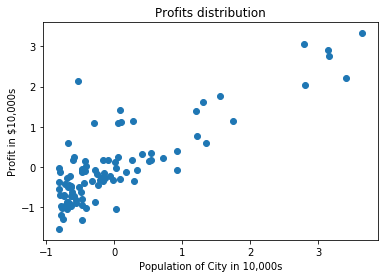

In [167]:
data = np.loadtxt('../../data/linear-regression/ex1data1.txt', delimiter=',')
X = data[:, 0].reshape(data[:, 0].shape[0], 1) # Population
Y = data[:, 1].reshape(data[:, 1].shape[0], 1) # profit

# Standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y)



scatter(X, Y)
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in $10,000s')

## Batch Gradient Descent

Gradient Descent를 할때 **전체 training dataset**을 사용해서 구합니다.<br>
<small style="color:#888888"> $ \nabla $ 는 derivativation을 가르키고, $ \Delta $ 는 차이점을 가르킴 </small>

$ \theta = \theta - \eta \cdot \nabla_\theta J( \theta) $

즉 weights(parameters) 한번을 업데이트 하기 위해서 **전체 dataset**을 다 돌려야 하기 때문에 매우 느리며, 메모리에 다 들어가지도 않는 경우가 많습니다. 또한 실시간으로 새로운 데이터가 입력되는 (on-the-fly)상황에서도 전체 데이터를 다 돌려야 하기때문에 적용을 할 수 없습니다.



<span style="color:#aa3333">
$$ \frac{\partial}{\partial \theta} = \Delta \theta =  \frac{2}{N} \sum^N_{i=1} -x_i(y_i - \sum_{j=0}(\theta_j x_j )) $$
</span>

<span style="color:#aa3333">
$$ \frac{\partial}{\partial b} = \Delta b = \frac{2}{N} \sum^N_{i=1} -(y_i - \sum_{j=0}(\theta_j x_j)) $$
</span>


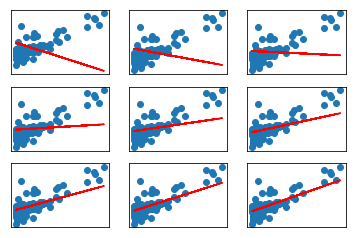

In [233]:
w = np.random.randn(2)

def predict(w, X):
    N = len(X)
    yhat = w[1:].dot(X.T) + w[0]
    yhat = yhat.reshape(X.shape)
    return yhat

def batch_gradient_descent(X, Y, w, eta=0.1):
    N = len(X)
    yhat = predict(w, X)
    gamma =  Y - yhat
    w_delta = 2/N * np.sum(-gamma * X)
    b_delta = 2/N * np.sum(-gamma)
    
    w[1:] = w[1:] - eta * w_delta
    w[0] = w[0] - eta * b_delta
    return w

for i in range(1, 10):
    
    w = batch_gradient_descent(X, Y, w)
    
    yhat = predict(w, X)
    
    axes = subplot(3, 3, i)
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    
    scatter(X, Y)
    plot(X, yhat, color='red')